## IBA for BERT example usage

In [1]:
import torch
from transformers import BertConfig, BertForSequenceClassification, BertTokenizer
from scripts.methods import *
from scripts.utils import *

## Initialize BERT

In [ ]:
config = BertConfig.from_pretrained("bert-base-uncased", output_hidden_states=True)
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", config=config)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

## Sample sentence (from IMDB)

In [ ]:
text = "I liked this movie a lot. It really intrigued me how Deanna and Alicia became friends over such a tragedy. Alicia was just a troubled soul and Deanna was so happy just to see someone after being shot. My only complaint was that in the beginning it was kind of slow and it took awhile to get to the basis of things. Other than that it was great."
target = 0 #0 for positive, 1 for negative
text_ids = torch.tensor([tokenizer.encode(text, add_special_tokens=True)]).to(device)
text_words = tokenizer.convert_ids_to_tokens(text_ids[0].tolist())
print(text_ids)
print(text_words)

In [7]:
layer_idx = 7
beta = 1e-5
lr = 1
train_steps = 10

## Train IB and visualize attribution map!

#### This is the attribution map before BERT is fine tuned on IMDB. We can see no-fine-tuned-BERT does not know what are important features

Training Bottleneck: 100%|██████████| 10/10 [00:16<00:00,  1.64s/it]


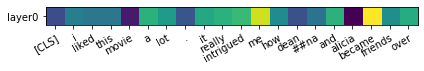

In [5]:
heatmap = layer_heatmap_iba(text, None, target, text_words, text_ids, None, model, layer_idx, beta, lr, train_steps)
visualize_heatmap([heatmap], 0, 20, text_words)

#### Now let's use BERT fine tuned on IMDB after 25000 steps and visualize the attribution map

Training Bottleneck: 100%|██████████| 10/10 [00:16<00:00,  1.70s/it]


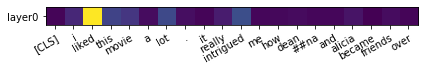

In [12]:
model_dir = 'finetuned_model/imdb.model'
model.load_state_dict(torch.load(model_dir, map_location=torch.device('cpu')))
finetuned_heatmap = layer_heatmap_iba(text, None, 0, text_words, text_ids,None, model, layer_idx, beta, lr, train_steps)
visualize_heatmap([finetuned_heatmap], 0, 20, text_words)